In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 0 < pT < 1

Y_OS = [15187.0, 14865.0, 14721.0, 14609.0, 13903.0, 13728.0, 13558.0, 13216.0, 12561.0, 12267.0, 11906.0, 11717.0, 11211.0, 10845.0, 10567.0, 9778.0, 9540.0, 9458.0, 9046.0, 8756.0, 8254.0, 7877.0, 7692.0, 7330.0, 7166.0, 6831.0, 6529.0, 6166.0, 5789.0, 5617.0, 5499.0, 5198.0, 5091.0, 4851.0, 4698.0, 4606.0, 4461.0, 4196.0, 4003.0, 3833.0, 3617.0, 3464.0, 3431.0, 3241.0, 3094.0, 2981.0, 2833.0, 2827.0, 2711.0, 2528.0, 2528.0, 2408.0, 2315.0, 2183.0, 2204.0, 2020.0, 2027.0, 1921.0, 1881.0, 1812.0, 1797.0, 1639.0, 1613.0, 1590.0, 1577.0, 1477.0, 1508.0, 1530.0, 1506.0, 1555.0, 1626.0, 1696.0, 1742.0, 1898.0, 2122.0, 2577.0, 2870.0, 3319.0, 3666.0, 4005.0, 3883.0, 3674.0, 3105.0, 2464.0, 1872.0, 1349.0, 1077.0, 881.0, 720.0, 611.0, 591.0, 569.0, 496.0, 465.0, 473.0, 456.0, 409.0, 410.0, 437.0, 432.0, 387.0, 399.0, 375.0, 352.0, 384.0, 347.0, 348.0, 341.0, 379.0, 332.0, 313.0, 347.0, 283.0, 306.0, 282.0, 241.0, 218.0, 213.0, 218.0, 206.0, 213.0, 200.0, 193.0, 205.0, 205.0, 198.0, 180.0, 180.0, 159.0, 179.0, 165.0, 163.0, 136.0, 151.0, 138.0, 138.0, 123.0, 129.0, 132.0, 117.0, 97.0, 119.0, 126.0, 111.0, 124.0, 116.0, 95.0, 116.0, 111.0, 107.0, 89.0, 90.0, 102.0, 89.0, 93.0, 87.0, 77.0, 81.0, 84.0, 83.0, 73.0, 79.0, 64.0, 77.0, 72.0, 69.0, 52.0, 75.0, 64.0, 55.0, 58.0, 50.0, 50.0, 66.0, 56.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [2885.0, 2862.0, 2758.0, 2767.0, 2657.0, 2665.0, 2572.0, 2402.0, 2361.0, 2300.0, 2215.0, 2197.0, 2082.0, 2075.0, 1911.0, 1756.0, 1692.0, 1634.0, 1650.0, 1560.0, 1481.0, 1328.0, 1287.0, 1232.0, 1198.0, 1146.0, 1066.0, 1007.0, 944.0, 947.0, 934.0, 832.0, 830.0, 792.0, 721.0, 724.0, 713.0, 656.0, 618.0, 598.0, 555.0, 533.0, 523.0, 525.0, 470.0, 435.0, 451.0, 421.0, 411.0, 459.0, 387.0, 346.0, 323.0, 338.0, 327.0, 330.0, 326.0, 300.0, 309.0, 282.0, 256.0, 263.0, 249.0, 241.0, 239.0, 212.0, 209.0, 202.0, 209.0, 187.0, 176.0, 188.0, 167.0, 176.0, 181.0, 150.0, 146.0, 156.0, 126.0, 135.0, 135.0, 116.0, 139.0, 113.0, 127.0, 110.0, 105.0, 117.0, 98.0, 87.0, 111.0, 108.0, 82.0, 87.0, 83.0, 86.0, 76.0, 96.0, 68.0, 74.0, 70.0, 66.0, 72.0, 83.0, 48.0, 58.0, 67.0, 69.0, 52.0, 63.0, 60.0, 46.0, 72.0, 51.0, 41.0, 54.0, 49.0, 57.0, 38.0, 40.0, 40.0, 31.0, 42.0, 45.0, 33.0, 33.0, 45.0, 40.0, 36.0, 28.0, 34.0, 29.0, 28.0, 31.0, 27.0, 39.0, 27.0, 32.0, 30.0, 25.0, 29.0, 22.0, 19.0, 34.0, 25.0, 27.0, 19.0, 20.0, 21.0, 24.0, 24.0, 27.0, 19.0, 23.0, 22.0, 22.0, 21.0, 17.0, 20.0, 16.0, 17.0, 22.0, 13.0, 18.0, 10.0, 18.0, 11.0, 19.0, 18.0, 14.0, 17.0, 20.0, 14.0, 11.0, 10.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [8.0, 10.0, 9.0, 9.0, 9.0, 16.0, 4.0, 13.0, 11.0, 17.0, 23.0, 11.0, 17.0, 14.0, 28.0, 19.0, 23.0, 33.0, 27.0, 34.0, 29.0, 23.0, 43.0, 33.0, 39.0, 44.0, 42.0, 40.0, 49.0, 52.0, 64.0, 61.0, 52.0, 70.0, 65.0, 69.0, 79.0, 79.0, 87.0, 97.0, 88.0, 97.0, 105.0, 108.0, 98.0, 151.0, 122.0, 124.0, 133.0, 145.0, 153.0, 162.0, 153.0, 172.0, 185.0, 218.0, 224.0, 232.0, 257.0, 300.0, 306.0, 341.0, 406.0, 464.0, 590.0, 600.0, 779.0, 869.0, 979.0, 1246.0, 1515.0, 1667.0, 2150.0, 2718.0, 3488.0, 4353.0, 5682.0, 7248.0, 8892.0, 10126.0, 10416.0, 9752.0, 8169.0, 5880.0, 3628.0, 2021.0, 1084.0, 480.0, 266.0, 135.0, 89.0, 63.0, 39.0, 38.0, 28.0, 17.0, 13.0, 13.0, 14.0, 13.0, 7.0, 7.0, 5.0, 4.0, 11.0, 8.0, 5.0, 6.0, 5.0, 3.0, 0.0, 6.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [4.0, 1.0, 0.0, 2.0, 2.0, 2.0, 1.0, 2.0, 4.0, 5.0, 5.0, 2.0, 3.0, 2.0, 4.0, 2.0, 5.0, 3.0, 8.0, 9.0, 10.0, 1.0, 4.0, 4.0, 6.0, 9.0, 11.0, 8.0, 9.0, 8.0, 14.0, 10.0, 19.0, 14.0, 18.0, 11.0, 15.0, 15.0, 14.0, 14.0, 19.0, 16.0, 28.0, 15.0, 21.0, 13.0, 23.0, 21.0, 15.0, 20.0, 38.0, 26.0, 25.0, 35.0, 31.0, 40.0, 43.0, 27.0, 38.0, 44.0, 43.0, 51.0, 35.0, 52.0, 44.0, 47.0, 45.0, 54.0, 57.0, 65.0, 71.0, 64.0, 55.0, 74.0, 71.0, 73.0, 75.0, 78.0, 87.0, 82.0, 82.0, 98.0, 128.0, 116.0, 111.0, 143.0, 165.0, 173.0, 187.0, 182.0, 231.0, 264.0, 313.0, 343.0, 374.0, 423.0, 489.0, 495.0, 573.0, 718.0, 837.0, 1043.0, 1284.0, 1598.0, 2061.0, 2609.0, 3219.0, 4130.0, 4819.0, 5401.0, 5362.0, 5069.0, 3961.0, 2750.0, 1707.0, 939.0, 448.0, 217.0, 120.0, 75.0, 36.0, 38.0, 24.0, 15.0, 11.0, 6.0, 9.0, 7.0, 5.0, 5.0, 4.0, 2.0, 5.0, 3.0, 1.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [12.0, 11.0, 9.0, 11.0, 11.0, 18.0, 5.0, 15.0, 15.0, 22.0, 28.0, 13.0, 20.0, 16.0, 32.0, 21.0, 28.0, 36.0, 35.0, 43.0, 39.0, 24.0, 47.0, 37.0, 45.0, 53.0, 53.0, 48.0, 58.0, 60.0, 78.0, 71.0, 71.0, 84.0, 83.0, 80.0, 94.0, 94.0, 101.0, 111.0, 107.0, 113.0, 133.0, 123.0, 119.0, 164.0, 145.0, 145.0, 148.0, 165.0, 191.0, 188.0, 178.0, 207.0, 216.0, 258.0, 267.0, 259.0, 295.0, 344.0, 349.0, 392.0, 441.0, 516.0, 634.0, 647.0, 824.0, 923.0, 1036.0, 1311.0, 1586.0, 1731.0, 2205.0, 2792.0, 3559.0, 4426.0, 5757.0, 7326.0, 8979.0, 10208.0, 10498.0, 9850.0, 8297.0, 5996.0, 3739.0, 2164.0, 1249.0, 653.0, 453.0, 317.0, 320.0, 327.0, 352.0, 381.0, 402.0, 440.0, 502.0, 508.0, 587.0, 731.0, 844.0, 1050.0, 1289.0, 1602.0, 2072.0, 2617.0, 3224.0, 4136.0, 4824.0, 5404.0, 5362.0, 5075.0, 3963.0, 2751.0, 1710.0, 940.0, 449.0, 218.0, 121.0, 76.0, 37.0, 39.0, 28.0, 17.0, 12.0, 7.0, 10.0, 7.0, 5.0, 7.0, 4.0, 2.0, 6.0, 4.0, 1.0, 2.0, 3.0, 0.0, 3.0, 2.0, 2.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 156846.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

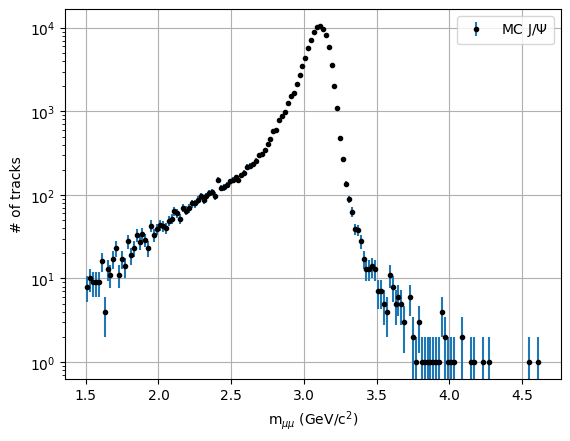

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [10695.443404802554, 3.102439711037195, 0.05990636321295364, 0.9189844400996037, 2.859860582058265, 2.5043269463872364, 2.3166285442485397]
pcov: 
 [[ 7.36688107e+03  1.28630387e-02 -2.52457258e-02 -5.00131323e-02
  -3.00836484e-01 -7.56514419e-01  1.67446177e+00]
 [ 1.28630387e-02  3.74936743e-07 -1.98271009e-07 -6.28084980e-06
   1.62980663e-05 -3.72798257e-06  4.58740603e-06]
 [-2.52457258e-02 -1.98271009e-07  2.54104341e-07  4.87999628e-06
  -9.46126444e-06  9.75332395e-06 -1.88589918e-05]
 [-5.00131323e-02 -6.28084980e-06  4.87999628e-06  2.79696942e-04
  -1.02201115e-03  1.69373700e-04 -2.88025079e-04]
 [-3.00836484e-01  1.62980663e-05 -9.46126444e-06 -1.02201115e-03
   5.36947262e-03 -2.75078360e-04  3.98743853e-04]
 [-7.56514419e-01 -3.72798257e-06  9.75332395e-06  1.69373700e-04
  -2.75078360e-04  4.98645437e-03 -1.56345580e-02]
 [ 1.67446177e+00  4.58740603e-06 -1.88589918e-05 -2.88025079e-04
   3.98743853e-04 -1.56345580e-02  6.50113086e-02]]
residual: 
 {'nfev': 8, 

fit error : 85.83097760018444


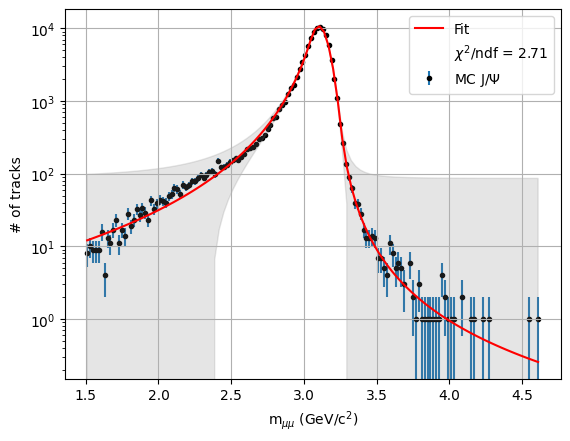

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

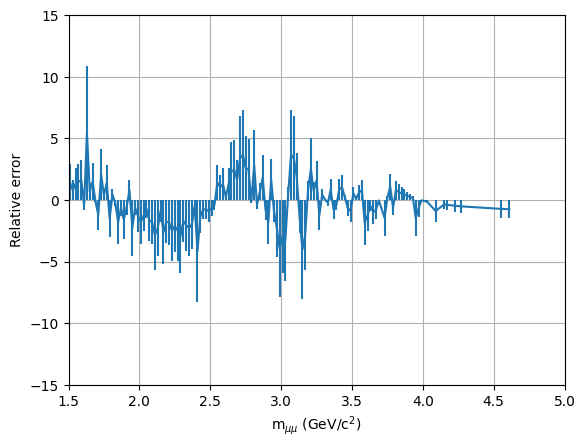

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

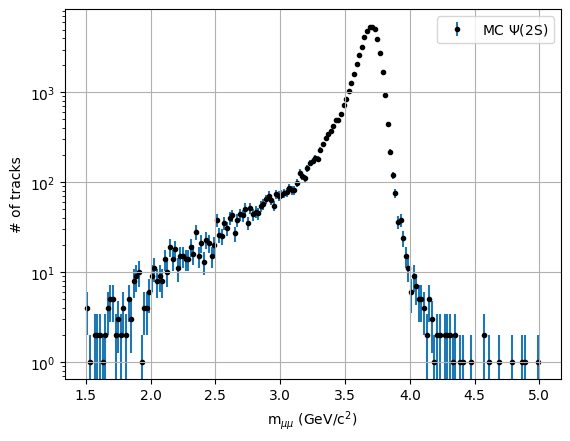

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [5614.011144316038, 3.697563442269081, 0.05996634438043462, 0.8530713009854309, 2.8160306104182435, 2.4780539986047696, 2.4938228342183906]
pcov: 
 [[ 3.12320387e+03  1.13584437e-02 -2.14440068e-02 -3.92510372e-02
  -2.48204103e-01 -8.44715792e-01  2.33377897e+00]
 [ 1.13584437e-02  6.42986153e-07 -3.56325199e-07 -9.43443121e-06
   2.11255283e-05 -8.72137068e-06  1.57444787e-05]
 [-2.14440068e-02 -3.56325199e-07  4.39222966e-07  7.43281370e-06
  -1.21415259e-05  2.10517074e-05 -5.27154466e-05]
 [-3.92510372e-02 -9.43443121e-06  7.43281370e-06  3.33921503e-04
  -1.06373856e-03  3.19687074e-04 -7.26483251e-04]
 [-2.48204103e-01  2.11255283e-05 -1.21415259e-05 -1.06373856e-03
   5.19791560e-03 -4.22729869e-04  8.26729138e-04]
 [-8.44715792e-01 -8.72137068e-06  2.10517074e-05  3.19687074e-04
  -4.22729869e-04  9.96350657e-03 -3.74968557e-02]
 [ 2.33377897e+00  1.57444787e-05 -5.27154466e-05 -7.26483251e-04
   8.26729138e-04 -3.74968557e-02  1.79402642e-01]]
residual: 
 {'nfev': 8, 

fit error : 55.88737573283924


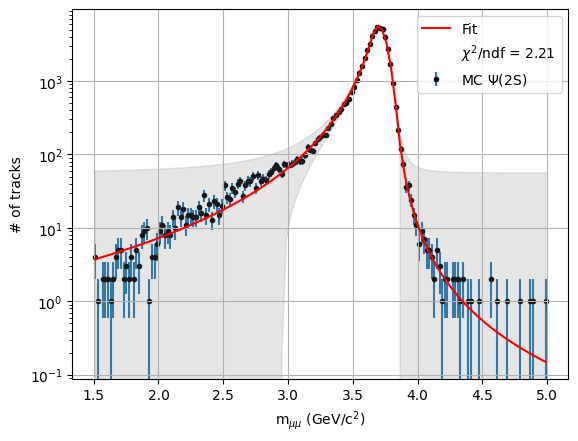

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

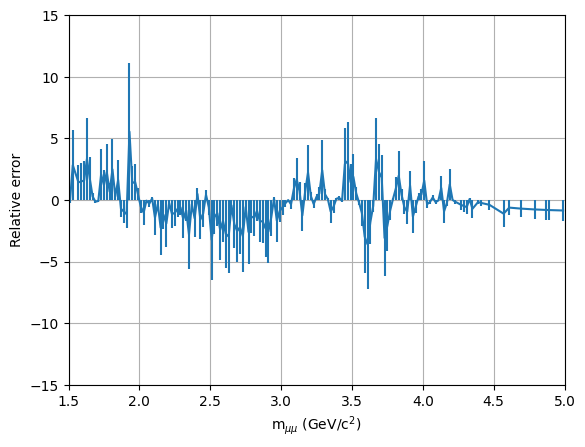

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

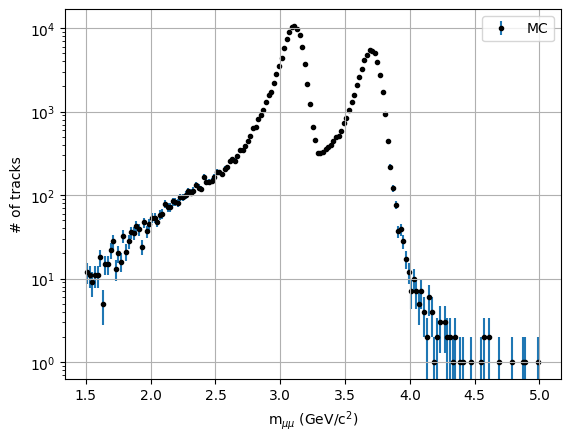

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [10675.880910763048, 3.1021337205837916, 0.06020398371458669, 5622.978788702193, 3.6976812785337065, 0.05976769166788524]
pcov: 
 [[ 8.15894460e+03  1.09266936e-02 -2.54387228e-02 -3.02863018e+01
  -8.29717066e-04  1.01208055e-03]
 [ 1.09266936e-02  2.40127272e-07 -6.14668161e-08 -2.91052493e-05
   1.85611663e-09 -9.01722730e-10]
 [-2.54387228e-02 -6.14668161e-08  1.52025775e-07  7.10072293e-04
   1.58899118e-08 -2.09225738e-08]
 [-3.02863018e+01 -2.91052493e-05  7.10072293e-04  4.20732721e+03
   1.30424594e-02 -2.55189585e-02]
 [-8.29717066e-04  1.85611663e-09  1.58899118e-08  1.30424594e-02
   4.81469594e-07 -1.59801328e-07]
 [ 1.01208055e-03 -9.01722730e-10 -2.09225738e-08 -2.55189585e-02
  -1.59801328e-07  3.00934492e-07]]
residual: 
 {'nfev': 5, 'fvec': array([ 1.14742529e+00,  1.65284863e+00,  2.67043043e+00,  1.97921219e+00,
        2.15347701e+00,  1.75989036e-01,  6.43048948e+00,  1.30158242e+00,
        1.48062593e+00, -1.14864407e-01, -1.09166004e+00,  2.77998918e+00

fit error : 111.20374011993935


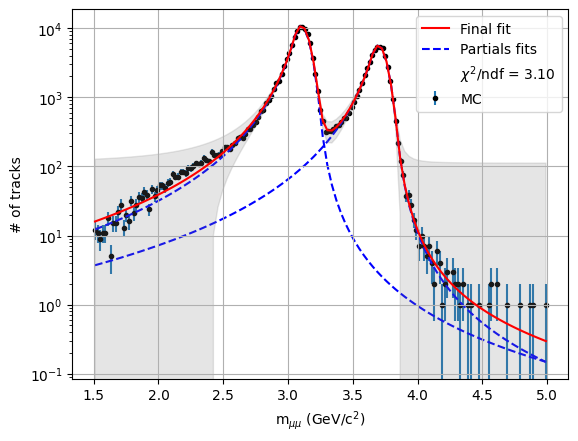

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_12549/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


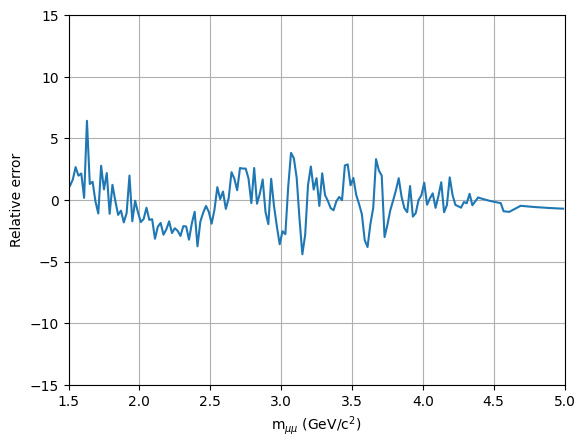

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

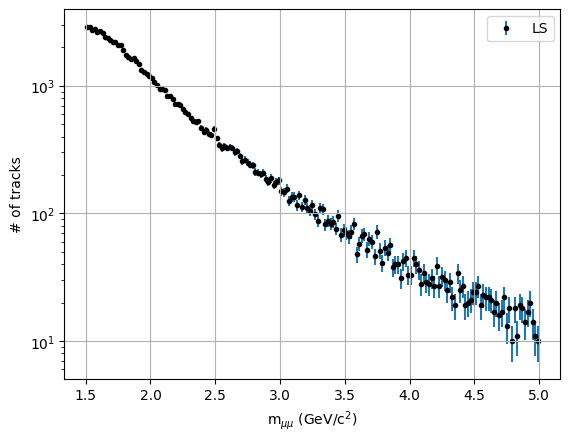

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [8.07013853165421, 6.003542805246924, 4.293481939643135, 3.87567126859767, 2.3559398180085087]
pcov: 
 [[ 1.10825230e-04 -1.42479945e-05  4.91366893e-05  1.26253391e-06
   1.58296244e-04]
 [-1.42479945e-05  7.76309635e-05  6.20384742e-05 -7.71597385e-06
   1.82876290e-04]
 [ 4.91366893e-05  6.20384742e-05  3.37461533e-04  3.46216753e-04
  -3.57637655e-04]
 [ 1.26253391e-06 -7.71597385e-06  3.46216753e-04  6.40769573e-04
  -1.33324408e-03]
 [ 1.58296244e-04  1.82876290e-04 -3.57637655e-04 -1.33324408e-03
   1.51954563e-02]]
residual: 
 {'nfev': 15, 'fvec': array([ 4.70645945,  2.97214736,  2.85210991,  0.59090201,  0.67600818,
       -1.47194449, -1.62628287, -0.17724912, -1.24888829, -1.8669142 ,
       -1.94007309, -3.35109539, -2.69352844, -4.25595923, -2.40286809,
       -0.53681244, -0.68803641, -0.92853803, -2.91147459, -2.29297929,
       -1.8581321 ,  0.65411194,  0.26199707,  0.31650069, -0.17627497,
       -0.09746299,  0.90195585,  1.3574869 ,  2.03497142,  0.57596925

fit error : 0.12791459501847446


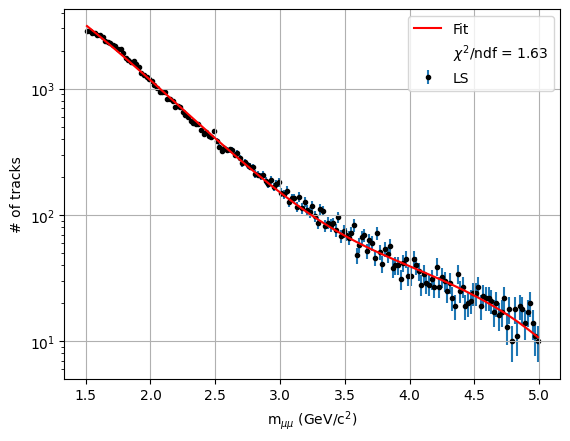

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

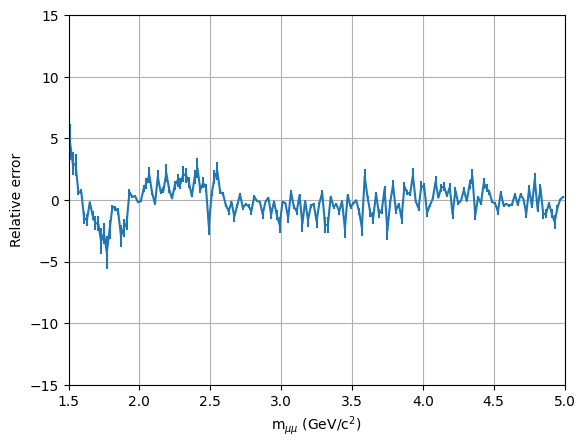

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

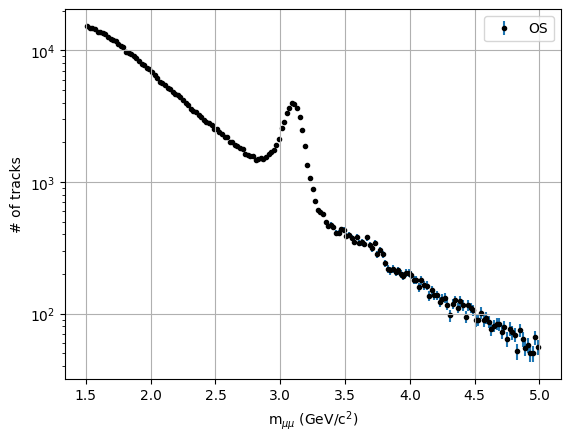

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [3331.565543907074, 3.0983981229891433, 0.06589699953424899, 81.27561215874398, 3.676655845997129, 0.06596297881847807, 9.684326375316987, 7.817512106824389, 5.960522149282361, 5.470195216393262, 3.8365874810143663]
pcov: 
 [[ 2.10415521e+03  8.29799349e-03 -2.67380074e-02  6.86439907e+00
  -1.01920373e-02  1.98149867e-02 -8.46889748e-03 -9.99552973e-03
  -4.17996361e-02 -3.07323470e-02 -3.06510450e-03]
 [ 8.29799349e-03  9.89277447e-07 -4.14128393e-07 -2.86225606e-04
   5.89440170e-07 -1.03730028e-06  3.27272456e-07  1.17688721e-06
   2.55705165e-06  1.30699582e-06  2.23786134e-06]
 [-2.67380074e-02 -4.14128393e-07  1.05910092e-06  1.11394190e-03
  -8.62865252e-07  1.76583638e-06 -8.74036534e-07 -2.37389893e-06
  -6.28443150e-06 -4.14864857e-06 -2.06447362e-06]
 [ 6.86439907e+00 -2.86225606e-04  1.11394190e-03  2.17291625e+02
   2.75254672e-02 -1.19665021e-01 -3.66451010e-03 -6.03113828e-03
  -4.04995116e-02 -5.10819971e-02  7.89379234e-02]
 [-1.01920373e-02  5.89440170e-07 -8

fit error : 48.18145546745729


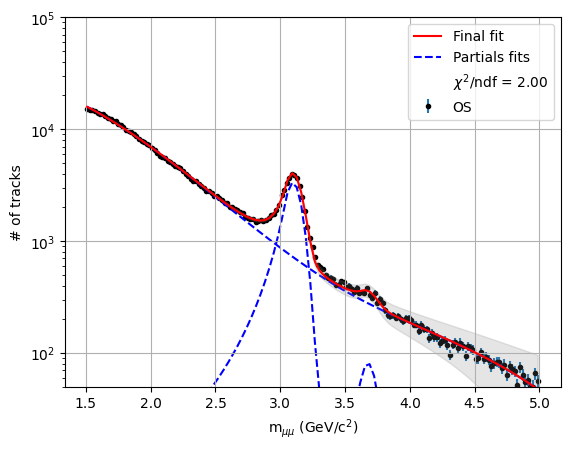

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

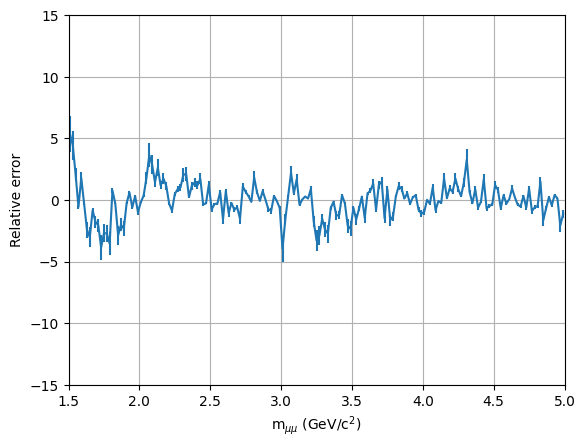

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  34566.88424006841  +/-  822.8944443741826 (stat.)
